# <center><u>Amazon Review Text Mining Solutions</u>

### Importing Libraries:

In [1]:
import pandas as pd
review = pd.read_csv('review.csv.txt', sep=',')
review.drop(columns = 'Unnamed: 0', axis = 0,inplace = True)
review.head(5)

,Rating,Title,Review,Review_Date
0,1.0,"Disappointed with Oneplus, but more so with Am...",I have been Oneplus user now for last 7 years ...,11 May 2022
1,1.0,The worst One Plus phone ever,The worst phone from One Plus. Not recommended...,10 May 2022
2,5.0,Good Budget Flagship,Nice PhonePros+Flat Display+Nice chipset+Batte...,10 May 2022
3,1.0,ONEPLUS HAS LOST ITS ORIGINALITY,One of the worst phone of OnePlus. It's more o...,10 May 2022
4,1.0,Packing was blade cut by FE or related staff b...,The media could not be loaded.,11 May 2022


In [2]:
type(review)

pandas.core.frame.DataFrame

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy

In [4]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# To identify the sentiment of text
from textblob import TextBlob

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anjali Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming

## EDA:

In [6]:
review.Rating.describe()

count    456.000000
mean       3.502193
std        1.645505
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [7]:
# Number of words:
review['word_count'] = review['Review'].apply(lambda x: len(str(x).split(" ")))
review[['Review','word_count']].head()

,Review,word_count
0,I have been Oneplus user now for last 7 years ...,532
1,The worst phone from One Plus. Not recommended...,47
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,9
3,One of the worst phone of OnePlus. It's more o...,225
4,The media could not be loaded.,6


In [8]:
# number of characters
review['char_count'] = review['Review'].str.len() ## this also includes spaces
review[['Review','char_count']].head()

,Review,char_count
0,I have been Oneplus user now for last 7 years ...,2945.0
1,The worst phone from One Plus. Not recommended...,250.0
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,111.0
3,One of the worst phone of OnePlus. It's more o...,1316.0
4,The media could not be loaded.,30.0


In [9]:
# average word length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

review['avg_word'] = review['Review'].apply(lambda x: avg_word(x))
review[['Review','avg_word']].head()

,Review,avg_word
0,I have been Oneplus user now for last 7 years ...,4.537594
1,The worst phone from One Plus. Not recommended...,4.340426
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,11.444444
3,One of the worst phone of OnePlus. It's more o...,4.853333
4,The media could not be loaded.,4.166667


In [10]:
# number of stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

review['stopwords'] = review['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
review[['Review','stopwords']].head()

,Review,stopwords
0,I have been Oneplus user now for last 7 years ...,208
1,The worst phone from One Plus. Not recommended...,18
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,1
3,One of the worst phone of OnePlus. It's more o...,102
4,The media could not be loaded.,2


In [11]:
# special characters
review['hashtags'] = review['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
review[['Review','hashtags']].head()

,Review,hashtags
0,I have been Oneplus user now for last 7 years ...,0
1,The worst phone from One Plus. Not recommended...,0
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,0
3,One of the worst phone of OnePlus. It's more o...,0
4,The media could not be loaded.,0


In [12]:
# numerics
review['numerics'] = review['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
review[['Review','numerics']].head()

,Review,numerics
0,I have been Oneplus user now for last 7 years ...,8
1,The worst phone from One Plus. Not recommended...,0
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,0
3,One of the worst phone of OnePlus. It's more o...,2
4,The media could not be loaded.,0


In [13]:
# upper-case
review['upper'] = review['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
review[['Review','upper']].head()

,Review,upper
0,I have been Oneplus user now for last 7 years ...,14
1,The worst phone from One Plus. Not recommended...,1
2,Nice PhonePros+Flat Display+Nice chipset+Batte...,0
3,One of the worst phone of OnePlus. It's more o...,3
4,The media could not be loaded.,0


In [14]:
review.columns

Index(['Rating', 'Title', 'Review', 'Review_Date', 'word_count', 'char_count',
       'avg_word', 'stopwords', 'hashtags', 'numerics', 'upper'],
      dtype='object')

In [15]:
review.drop(columns = ['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

### Spelling Correction:

- In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

- To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [16]:
from textblob import TextBlob
review['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I have been Oneplus user now for last 7 years ...
1    The worst phone from One Plus. Not recommended...
2    Vice PhonePros+Flat Display+Vice chisel+Batter...
3    One of the worst phone of OnePlus. It's more o...
4                       The media could not be loaded.
Name: Review, dtype: object

### Feature Engineering

In [17]:
print(review['Review_Date'].str.split(' ').str[0],'\n',
      review['Review_Date'].str.split(' ').str[1],'\n',
      review['Review_Date'].str.split(' ').str[2])

0      11
1      10
2      10
3      10
4      11
       ..
451    21
452    22
453    19
454    21
455    17
Name: Review_Date, Length: 456, dtype: object 
 0       May
1       May
2       May
3       May
4       May
       ... 
451    June
452    June
453    June
454    June
455    June
Name: Review_Date, Length: 456, dtype: object 
 0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
451    2022
452    2022
453    2022
454    2022
455    2022
Name: Review_Date, Length: 456, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [18]:
df=review.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,11,May,2022
1,10,May,2022
2,10,May,2022
3,10,May,2022
4,11,May,2022
...,...,...,...
451,21,June,2022
452,22,June,2022
453,19,June,2022
454,21,June,2022


In [19]:
df.Month.value_counts()

May     260
June    196
Name: Month, dtype: int64

In [20]:
# Change 'month' from words to numbers for easier analysis
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,5
1,5
2,5
3,5
4,5
...,...
451,6
452,6
453,6
454,6


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       456 non-null    float64
 1   Title        456 non-null    object 
 2   Review       442 non-null    object 
 3   Review_Date  456 non-null    object 
 4   Date         456 non-null    object 
 5   Month        456 non-null    int64  
 6   Year         456 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 25.1+ KB


In [22]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       456 non-null    float64
 1   Title        456 non-null    object 
 2   Review       442 non-null    object 
 3   Review_Date  456 non-null    object 
 4   Date         456 non-null    int64  
 5   Month        456 non-null    int64  
 6   Year         456 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 25.1+ KB


In [23]:
# Dropping the Original Columns after splitting the data
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,1.0,"Disappointed with Oneplus, but more so with Am...",I have been Oneplus user now for last 7 years ...,11,5,2022
1,1.0,The worst One Plus phone ever,The worst phone from One Plus. Not recommended...,10,5,2022
2,5.0,Good Budget Flagship,Nice PhonePros+Flat Display+Nice chipset+Batte...,10,5,2022
3,1.0,ONEPLUS HAS LOST ITS ORIGINALITY,One of the worst phone of OnePlus. It's more o...,10,5,2022
4,1.0,Packing was blade cut by FE or related staff b...,The media could not be loaded.,11,5,2022


## Data Visualization

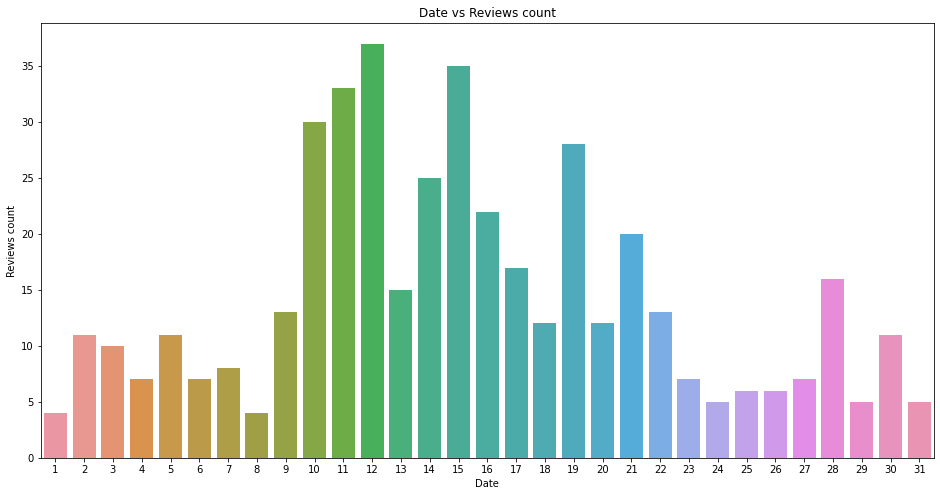

In [24]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

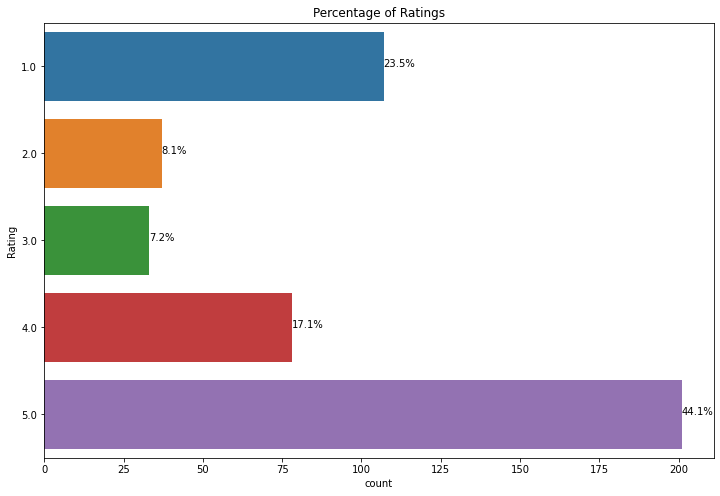

In [25]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = review)
total = len(review)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

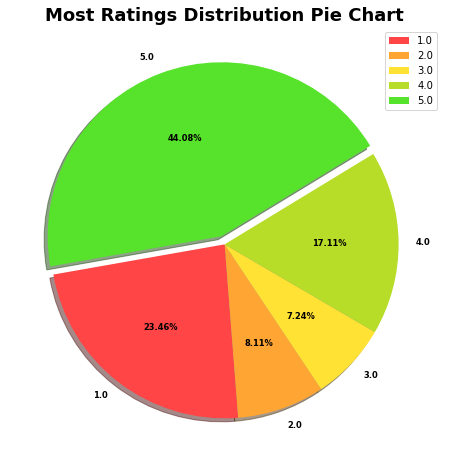

In [26]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

## Basic text processing for Sentiment Analysis:

In [27]:
data = df[['Review']]
data

,Review
0,I have been Oneplus user now for last 7 years ...
1,The worst phone from One Plus. Not recommended...
2,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,One of the worst phone of OnePlus. It's more o...
4,The media could not be loaded.
...,...
451,Ok
452,One plus 10 R 😍😍😍😍
453,"Except that the build quality is plastic ,the ..."
454,After using one week I find the phone is good ...


In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [29]:
from tqdm.notebook import tqdm_notebook
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/456 [00:00<?, ?it/s]

In [30]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.


## Text Preprocessing:

In [31]:
# removing @names
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [32]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [33]:
# removing links
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [34]:
# removing review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [35]:
# dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [36]:
# resetting index:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [37]:
# removing punctuation, special characters and numbers
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [38]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [39]:
# removing emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [40]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [41]:
from nltk.tokenize import word_tokenize

dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...,"[oneplus, user, last, year, look, beyond, onep..."
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...,"[worst, phone, one, plus, recommended, cheap, ..."
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...,"[nice, phonepros, flat, display, nice, chipset..."
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...,"[one, worst, phone, oneplus, oppo, stuff, body..."
4,medium could loaded,The media could not be loaded.,"[medium, could, loaded]"
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...,"[used, one, plus, five, year, bought, one, wee..."
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...,"[pro, awesome, display, good, battery, backup,..."
7,medium could loaded,The media could not be loaded.,"[medium, could, loaded]"
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...,"[worst, camera, quality, adding, additional, m..."
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...,"[oneplus, fan, long, time, oneplus, phone, use..."


In [42]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [43]:
# removing stop words
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [44]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [45]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,oneplus user last year look beyond oneplus bra...,I have been Oneplus user now for last 7 years ...
1,worst phone one plus recommended cheap look de...,The worst phone from One Plus. Not recommended...
2,nice phonepros flat display nice chipset batte...,Nice PhonePros+Flat Display+Nice chipset+Batte...
3,one worst phone oneplus oppo stuff body made c...,One of the worst phone of OnePlus. It's more o...
4,medium could loaded,The media could not be loaded.
5,used one plus five year bought one week back p...,I used the one plus 5 for five years and have ...
6,pro awesome display good battery backup take m...,Pros:-awesome display-good battery backup-take...
7,medium could loaded,The media could not be loaded.
8,worst camera quality adding additional makeup ...,Worst camera quality - Adding additional makeu...
9,oneplus fan long time oneplus phone user like ...,I am a OnePlus fan & a very long time OnePlus ...


In [46]:
# tokenize "clean reviews"
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['worst', 'phone', 'one', 'plus', 'recommended', 'cheap', 'look', 'design', 'slow', 'performance', 'worth', 'k', 'exchanging', 'older', 'phone', 'sure', 'going', 'miss', 'golden', 'phone', 'bakwas', 'phone', 'try', 'buy', 'phone'])

In [47]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [oneplus, user, last, year, look, beyond, onep...
1    [worst, phone, one, plus, recommended, cheap, ...
2    [nice, phonepros, flat, display, nice, chipset...
3    [one, worst, phone, oneplus, oppo, stuff, body...
4                              [medium, could, loaded]
5    [used, one, plus, five, year, bought, one, wee...
6    [pro, awesome, display, good, battery, backup,...
7                              [medium, could, loaded]
8    [worst, camera, quality, adding, additional, m...
9    [oneplus, fan, long, time, oneplus, phone, use...
Name: Clean_Reviews, dtype: object

In [48]:
# converting words to stemmer
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [49]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,oneplus user last year look beyond oneplus bra...
1,worst phone one plus recommend cheap look desi...
2,nice phonepro flat display nice chipset batter...
3,one worst phone oneplus oppo stuff bodi made c...
4,medium could load
...,...
451,ok
452,one plus r
453,except build qualiti plastic phone snappi smoo...
454,use one week find phone good batati back need ...


In [50]:
# converting words to lemma
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to C:\Users\Anjali
[nltk_data]     Chawda\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,oneplus user last year look beyond oneplus bra...
1,worst phone one plus recommended cheap look de...
2,nice phonepros flat display nice chipset batte...
3,one worst phone oneplus oppo stuff body made c...
4,medium could loaded
...,...
451,ok
452,one plus r
453,except build quality plastic phone snappy smoo...
454,using one week find phone good bataty back nee...


## Basic Feature Extraction:

In [51]:
# Applying bag of Words without N grams
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [52]:
print(cv.get_feature_names()[109:200])

['biometric', 'bit', 'black', 'blacked', 'blindly', 'bloatfree', 'bloatware', 'bluetooth', 'blur', 'blurry', 'bo', 'body', 'bole', 'bother', 'bought', 'box', 'brand', 'bright', 'brightness', 'brilliant', 'broke', 'broken', 'brousing', 'budget', 'bug', 'buggy', 'build', 'built', 'bulky', 'burning', 'business', 'butter', 'butterly', 'button', 'buttonbattery', 'buy', 'cable', 'calculator', 'call', 'called', 'cam', 'came', 'camera', 'cameraisse', 'camerasuper', 'cancelled', 'cannot', 'capable', 'captues', 'card', 'care', 'carry', 'case', 'category', 'cell', 'center', 'centre', 'certificate', 'chalta', 'chan', 'chance', 'changed', 'changer', 'changing', 'charge', 'charged', 'charger', 'charging', 'charginglight', 'chat', 'cheap', 'cheaper', 'cheapest', 'cheated', 'cheating', 'check', 'checking', 'chinese', 'chipset', 'choice', 'chrgng', 'city', 'claim', 'claimed', 'clarity', 'classy', 'clean', 'clear', 'click', 'clicked', 'close']


In [53]:
print(cv.get_feature_names()[:100])

['aaj', 'aane', 'able', 'acceptable', 'access', 'accha', 'according', 'acivities', 'across', 'activated', 'ad', 'adapter', 'added', 'addicted', 'adding', 'addition', 'additional', 'address', 'advisable', 'advise', 'agreed', 'ahe', 'ahead', 'ai', 'alert', 'alexa', 'almost', 'alot', 'already', 'also', 'although', 'aluminium', 'amazing', 'amazon', 'amount', 'analyse', 'anddd', 'andno', 'andoneplus', 'android', 'angle', 'announcement', 'another', 'anyone', 'anything', 'apart', 'apex', 'apna', 'app', 'appear', 'appearing', 'apple', 'appleprocessor', 'application', 'applicationsdemarit', 'approval', 'apps', 'around', 'asap', 'asked', 'asom', 'aspect', 'associate', 'assure', 'atleast', 'attached', 'audio', 'aur', 'ausm', 'auto', 'automatic', 'automatically', 'available', 'average', 'avoid', 'awesome', 'awsome', 'back', 'backside', 'backup', 'backupdecent', 'bad', 'baked', 'bakwas', 'bank', 'bare', 'base', 'based', 'basic', 'bataty', 'batter', 'battery', 'battey', 'battry', 'bcoz', 'beast', 'b

In [54]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
# CountVectorizer with N-grams (Bigrams & Trigrams)

In [56]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/456 [00:00<?, ?it/s]

In [57]:
corpus[3]

'one worst phone oneplu oppo stuff bodi made cheap plastic k rang x factor addit rcvd phone sim get detect check imei number reflect null screenshot attach manufactur defect devic imei number total chines materi come batteri phone get fulli charg min watt charger charger get heat like anyth full charg also batteri support hr moder use charg devic minimum time moreov initi replac procedur cumbersom first technician come check phone approv devic return replac initi mean wait anoth day plastic box procedur return devic manufactur defect replac total wast money avoid oneplu go brand provid featur spec oneplu rate oneplu devic henceforth rebrand counterpart market buy phone regret'

In [58]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [59]:
X.shape

(456, 5000)

In [60]:
cv.get_feature_names()[:20]

['aaj',
 'abl',
 'accha',
 'ad',
 'addit',
 'advis',
 'ahe',
 'ahead',
 'alert',
 'alert slider',
 'alexa',
 'almost',
 'almost day',
 'alreadi',
 'alreadi use',
 'also',
 'also fast',
 'also good',
 'although',
 'amaz']

In [61]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [62]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aaj,abl,accha,ad,addit,advis,ahe,ahead,alert,alert slider,...,youtub video,youtub video charg,yr,yr even,yr even sure,yr poor,yr poor camera,zoom,zoom imag,zoom imag distort
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# TF-IDF Vectorizer
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/456 [00:00<?, ?it/s]

In [64]:
corpus[4]

'medium could load'

In [65]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [66]:
X.shape

(456, 5000)

In [67]:
tfidf_v.get_feature_names()[:20]

['aaj',
 'abl',
 'accha',
 'ad',
 'addit',
 'advis',
 'ahe',
 'ahead',
 'alert',
 'alert slider',
 'alexa',
 'almost',
 'almost day',
 'alreadi',
 'alreadi use',
 'also',
 'also fast',
 'also good',
 'although',
 'amaz']

In [68]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [69]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,aaj,abl,accha,ad,addit,advis,ahe,ahead,alert,alert slider,...,youtub video,youtub video charg,yr,yr even,yr even sure,yr poor,yr poor camera,zoom,zoom imag,zoom imag distort
0,0.0,0.0,0.0,0.029623,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.057382,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NER : Named Entity Recognition:
- The named entity recognition (NER) is one of the most data preprocessing task. It involves the identification of key information in the text and classification into a set of predefined categories. An entity is basically the thing that is consistently talked about or refer to in the text.
- NER is the form of NLP.

- At its core, NLP is just a two-step process, below are the two steps that are involved:

    - Detecting the entities from the text
    - Classifying them into different categories

In [71]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'oneplus user last year look beyond oneplus brand even new phone used nokia feature phone day oneplus broke two piece get hand oneplus r first impression phone felt quite bulky heavy compared phone first one hour phone usage normal inserted sim card three major issue faced network connectivity kept flickering every nd second bad screen turn middle usage phone typing watching video surfing etc looked like buggy software phone took hour charge watt model compared claim full charge minute hoped update oxygen fix solve neither problem major disappointment amazon requested replacement downloading app app submitting performance issue amazon amazon representative raised replacement request new phone supposed delivered next day travel another city made difficult rd day multiple follow ups another person amazon come check phone tell replacement delivered day evening guess amazon cancelled replacement complaint twitter supervisor etc informed refunded entire amount phone day still waiting phone 

In [72]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [73]:
for token in doc_block[:50]:
    print(token,token.pos_)  

oneplus NOUN
user NOUN
last ADJ
year NOUN
look VERB
beyond ADP
oneplus NOUN
brand NOUN
even ADV
new ADJ
phone NOUN
used VERB
nokia NOUN
feature NOUN
phone NOUN
day NOUN
oneplus NOUN
broke VERB
two NUM
piece NOUN
get VERB
hand NOUN
oneplus NOUN
r NOUN
first ADJ
impression NOUN
phone NOUN
felt VERB
quite ADV
bulky ADJ
heavy ADJ
compared VERB
phone NOUN
first ADJ
one NUM
hour NOUN
phone NOUN
usage NOUN
normal ADJ
inserted VERB
sim ADJ
card NOUN
three NUM
major ADJ
issue NOUN
faced VERB
network NOUN
connectivity NOUN
kept VERB
flickering VERB


In [74]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['informed', 'amount', 'phone', 'day', 'waiting', 'phone', 'picked', 'course', 'refund', 'day', 'process', 'team', 'lied', 'face', 'regarding', 'cancelled', 'replacement', 'chat', 'twitter', 'phone', 'life', 'went', 'service', 'center', 'informed', 'software', 'installed', 'beginning', 'corrected', 'seems', 'working', 'issue', 'mentioned', 'battery', 'issue', 'informed', 'issue', 'persist', 'get', 'phone', 'replaced', 'oneplus', 'prefer', 'phone', 'returned', 'amazon', 'refunded', 'update', 'month', 'fight', 'amazon', 'pick', 'phone', 'city', 'self', 'return', 'screwed', 'time', 'picking', 'phone', 'asked', 'self', 'return', 'refunded', 'wanted', 'phone', 'processor', 'find', 'option', 'brand', 'trust', 'xiomi', 'give', 'ad', 'experience', 'clutter', 'budget', 'ordered', 'oneplus', 'r', 'time', 'seems', 'running', 'look', 'feel', 'phone', 'recommended', 'look', 'design', 'performance', 'exchanging', 'phone', 'going', 'miss', 'phone', 'bakwas', 'phone', 'try', 'buy', 'phone']


In [75]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,410
1,camera,191
2,battery,150
3,oneplus,125
4,charging,107
5,issue,89
6,day,80
7,quality,70
8,using,68
9,performance,62


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

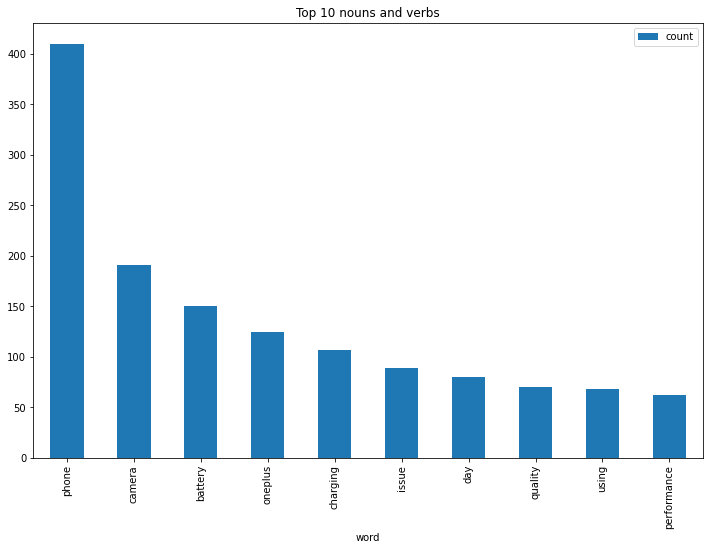

In [76]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

## For this particular Text Mining I have taken help of various websites, including GeeksforGeeks. 